Lab1: Complete the TODO parts in the following code. 
- Using California Housing Dataset from sklearn, select input attributes 1,3,4  as the input features. 
- Using K-fold cross validation technique (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), complete the implementation to train a regression model and report performance merics when asked in the following code. 
- For multiple degrees of model complexity (i.e., degree of polynomial in this exercise) in a for-loop, obtain the model with the minimum reducible_error, polynomial degree, and run the obtained model on the test data. For this part,you should use the split the data into train and test by [75:25] rate and report mse of the final model on test data. 
- Analyse the results of model performance according to different degrees of polynomial and the number of folds used. You can manipulate the code and share your analysis in terms of the performance of the model (mse and total error), such as for instnace which degree of the model complexity (in relation to the polynomial order) would give a better model? Feel free to include other analysis about the generated models in relation to their performance results. You can event plot the results to support your analysis. 

Variance: 0.0412, Bias2: 1.3112, Total error: 1.3524
Variance: 0.0088, Bias2: 1.1757, Total error: 1.1845
Variance: 0.0186, Bias2: 1.6176, Total error: 1.6362
Variance: 0.0078, Bias2: 1.2539, Total error: 1.2617
Variance: 0.0144, Bias2: 1.5311, Total error: 1.5455
[1.3523657590574567, 1.184499570032298, 1.6362196507657434, 1.2617112037331668, 1.5454660911446687]
Total Error of Best Model: 1.184499570032298
Degree: 1 MSE: 1.304663424729323
Variance: 0.0593, Bias2: 1.3233, Total error: 1.3827
Variance: 0.0267, Bias2: 1.1753, Total error: 1.2020
Variance: 0.0287, Bias2: 1.6266, Total error: 1.6553
Variance: 0.0319, Bias2: 1.2559, Total error: 1.2878
Variance: 0.0229, Bias2: 1.5353, Total error: 1.5582
[1.3826853179437073, 1.2019937605673676, 1.6553021423636753, 1.2877922409831843, 1.5582214835025017]
Total Error of Best Model: 1.2019937605673676
Degree: 2 MSE: 1.3180732417264984
Variance: 1.3813, Bias2: 1.3039, Total error: 2.6852
Variance: 0.0357, Bias2: 1.1765, Total error: 1.2122
Varia

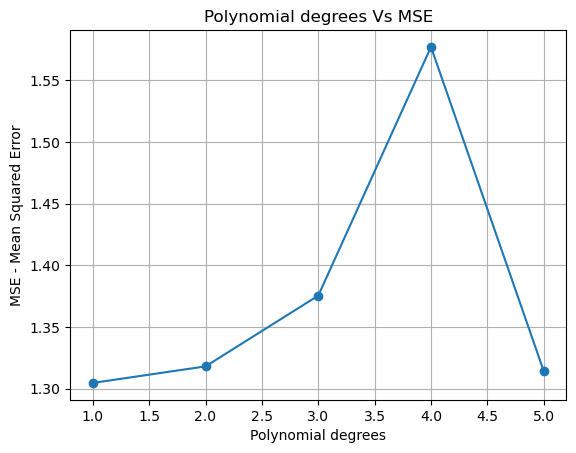

Degree 1: The MSE is relatively low, this indicates that the model is making fairly accurate predictions. However, it might also be underfitting the data because it's very simple
Degree 2: The MSE is slightly higher than for degree 1. This suggests that the quadratic model is capturing a bit more of the underlying complexity but may still be underfitting.
Degree 3: The MSE increases further, indicating that adding more complexity with a cubic polynomial doesn't improve the model's performance significantly. It could suggest that the model is starting to overfit the data.
Degree 4: The MSE increases significantly, which is a sign of overfitting. The model is likely capturing noise in the data rather than the underlying pattern.
Degree 5: The MSE drops again, but not as low as it was with lower degrees. This could indicate that the model is adjusting to the noise, but it's still overfitting to some extent.
From this analysis, it seems that a degree 1 or 2 polynomial might be the best cho

In [8]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias2s, total_error, and models
    # TODO--DONE
    bias2s_list=[]
    var_list=[]
    total_error=[]
    models_list=[]

    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate variance and R^2 for this fold
        ## TODO -- DONE
       # bias2 = mean_squared_error(y_test, y_pred)
        #variance = np.var(y_pred)

        bias2 = np.mean((np.mean(model.predict(X_test))- y_test) ** 2)
        variance = np.mean((np.mean(model.predict(X_test))-model.predict(X_test))**2)


        
        # Append results to lists
        # TODO -- DONE
        bias2s_list.append(bias2)
        var_list.append(variance)
        # Append the model to the list of models
        models_list.append(model)
        # Print results for this fold
        total_error.append(variance + bias2)
        print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(var_list[-1], bias2s_list[-1], total_error[-1]))

    
    
    # print the total_error of the best model
    min_error_index = np.argmin(total_error)
    best_model = models_list[min_error_index]
    # TODO--DONE
    print(total_error)
    print("Total Error of Best Model:", total_error[min_error_index])


    # Testing the final model on the test data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=42)
    # Obtain the predictions on the test data
    # TODO--DONE
    best_model = LinearRegression()
    best_model.fit(X_train, y_train)
    y_pred_test = best_model.predict(X_test)

    # store mse score of the model applied on the test data
    # TODO
    mse = mean_squared_error(y_test, y_pred_test)


    return mse , best_model






# Example usage: load California Housing Dataset and select the first, third, and forth attributes as input features in X
# TODO--DONE
data = fetch_california_housing()
X = data.data[:, [1, 3, 4]]

# Set the target valiable 
# TODO--DONE
y = data.target
list_mse=[]
degrees = range(1, 6)  # Try polynomial degrees from 1 to 5
# Try degrees from 1 to 5 and in a loop, report mse of the best model trained using k-fold cross validation and print("Degree:", degree, "MSE:", mse)
# TODO--DONE
for degree in degrees:
    mse, best_model = polynomial_regression(degree, X, y, folds=5, random_state=42)
    print("Degree:", degree, "MSE:", mse)
    list_mse.append(mse)

#plot degre vs MSE
plt.plot(degrees,list_mse, marker='o')
plt.xlabel('Polynomial degrees')
plt.ylabel('MSE - Mean Squared Error')
plt.title('Polynomial degrees Vs MSE')
plt.grid(True)
plt.show()

print("Degree 1: The MSE is relatively low, this indicates that the model is making fairly accurate predictions. However, it might also be underfitting the data because it's very simple")
print("Degree 2: The MSE is slightly higher than for degree 1. This suggests that the quadratic model is capturing a bit more of the underlying complexity but may still be underfitting.")
print("Degree 3: The MSE increases further, indicating that adding more complexity with a cubic polynomial doesn't improve the model's performance significantly. It could suggest that the model is starting to overfit the data.")
print("Degree 4: The MSE increases significantly, which is a sign of overfitting. The model is likely capturing noise in the data rather than the underlying pattern.")
print("Degree 5: The MSE drops again, but not as low as it was with lower degrees. This could indicate that the model is adjusting to the noise, but it's still overfitting to some extent.")
print("From this analysis, it seems that a degree 1 or 2 polynomial might be the best choice for this dataset. It's essential to strike a balance between model complexity and performance, avoiding both underfitting and overfitting.")


